In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data_dir = '/content/drive/MyDrive/horse-or-human'

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_images_from_directory(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                img_path = os.path.join(label_dir, file)
                if img_path.endswith(('png')):
                    img = load_img(img_path, target_size=(150, 150))
                    img_array = img_to_array(img) / 255.0
                    images.append(img_array)
                    labels.append(label)
    print(f'Total images: {len(images)}')
    return np.array(images), np.array(labels)

# Load images and labels
images, labels = load_images_from_directory(data_dir)

Total images: 1027


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
print(f'Train set: {X_train.shape[0]} images')
print(f'Test set: {X_test.shape[0]} images')

Train set: 821 images
Test set: 206 images


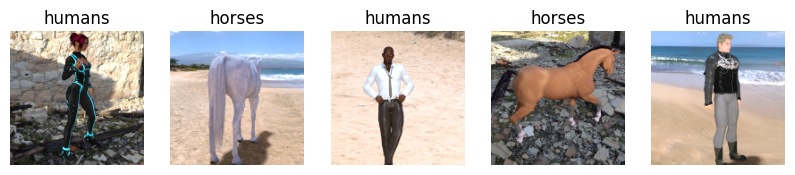

In [6]:
import matplotlib.pyplot as plt

def display_samples(images, labels, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

display_samples(X_train, y_train)

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras import models

def build_transfer_model(base_model, neurons=128, dropout_rate=0.3):
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(neurons, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    return model

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [11]:
from tensorflow.keras.optimizers import Adam

def compile_and_train(model, learning_rate, batch_size, epochs=5):
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=epochs, batch_size=batch_size, verbose=1)
    return history

In [12]:
from tensorflow.keras.applications import MobileNetV2, ResNet50

experiments = [
    (MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3)), 'MobileNetV2'),
    (ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3)), 'ResNet50')
]

<ipython-input-12-6ac31d632d52>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  (MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3)), 'MobileNetV2'),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
def plot_metrics(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='Training Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_title('Accuracy')
    ax2.legend()
    plt.show()


Evaluating MobileNetV2


learning_rate=0.001, batch_size=32, neurons=128
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 724ms/step - accuracy: 0.9320 - loss: 0.1628 - val_accuracy: 0.9903 - val_loss: 0.0146
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 640ms/step - accuracy: 0.9921 - loss: 0.0183 - val_accuracy: 0.9951 - val_loss: 0.0050
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 639ms/step - accuracy: 1.0000 - loss: 5.3307e-04 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 21s 664ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 26s 904ms/step - accuracy: 1.0000 - loss: 3.0583e-04 - val_accuracy: 1.0000 - val_loss: 0.0012


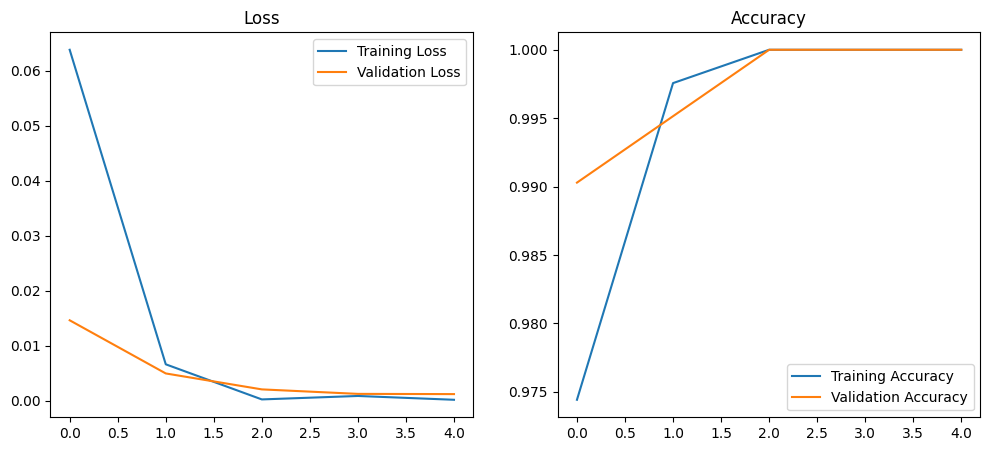

Test Loss: 0.0012, Test Accuracy: 1.0000


learning_rate=0.0005, batch_size=64, neurons=64
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.7268 - loss: 0.6149 - val_accuracy: 0.9951 - val_loss: 0.0248
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9957 - loss: 0.0196 - val_accuracy: 0.9951 - val_loss: 0.0107
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.9996 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.9994 - loss: 0.0060 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0040


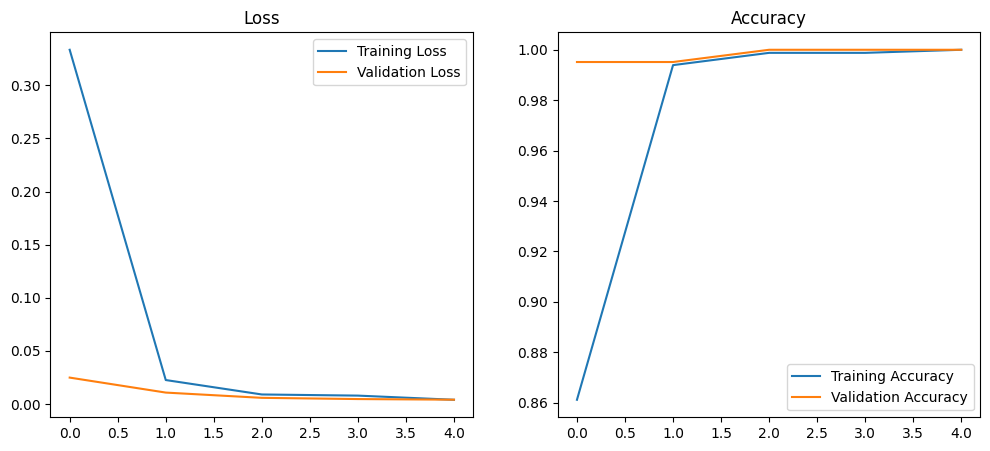

Test Loss: 0.0040, Test Accuracy: 1.0000


Evaluating ResNet50


learning_rate=0.001, batch_size=32, neurons=128
Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step - accuracy: 0.5565 - loss: 0.7327 - val_accuracy: 0.5243 - val_loss: 0.6660
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5402 - loss: 0.6842 - val_accuracy: 0.5825 - val_loss: 0.6452
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.6406 - loss: 0.6314 - val_accuracy: 0.6117 - val_loss: 0.6179
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.7024 - loss: 0.5906 - val_accuracy: 0.6699 - val_loss: 0.5830
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.7545 - loss: 0.5530 - val_accuracy: 0.7864 - val_loss: 0.5479


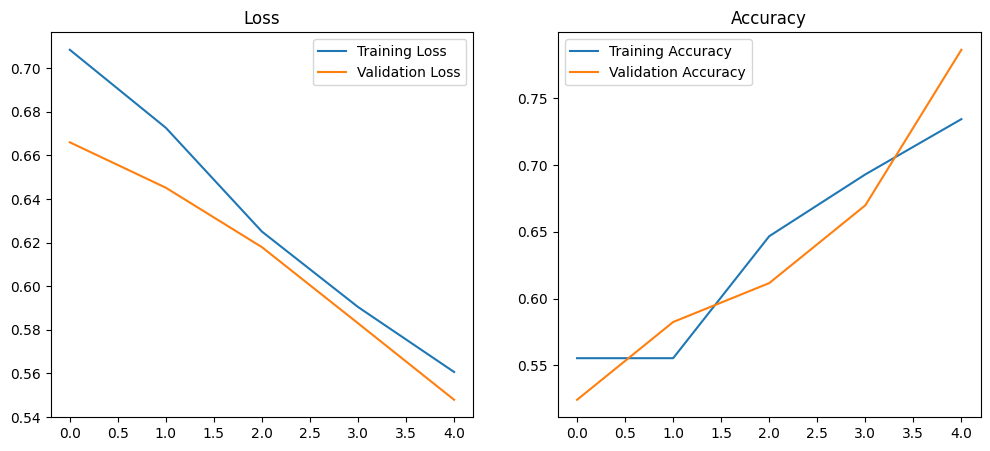

Test Loss: 0.5479, Test Accuracy: 0.7864


learning_rate=0.0005, batch_size=64, neurons=64
Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 101s 7s/step - accuracy: 0.5052 - loss: 0.7069 - val_accuracy: 0.6408 - val_loss: 0.6830
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.5316 - loss: 0.6884 - val_accuracy: 0.5971 - val_loss: 0.6737
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 108s 9s/step - accuracy: 0.5549 - loss: 0.6845 - val_accuracy: 0.6359 - val_loss: 0.6648
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 121s 7s/step - accuracy: 0.6027 - loss: 0.6621 - val_accuracy: 0.6068 - val_loss: 0.6592
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 137s 6s/step - accuracy: 0.6284 - loss: 0.6544 - val_accuracy: 0.6505 - val_loss: 0.6491


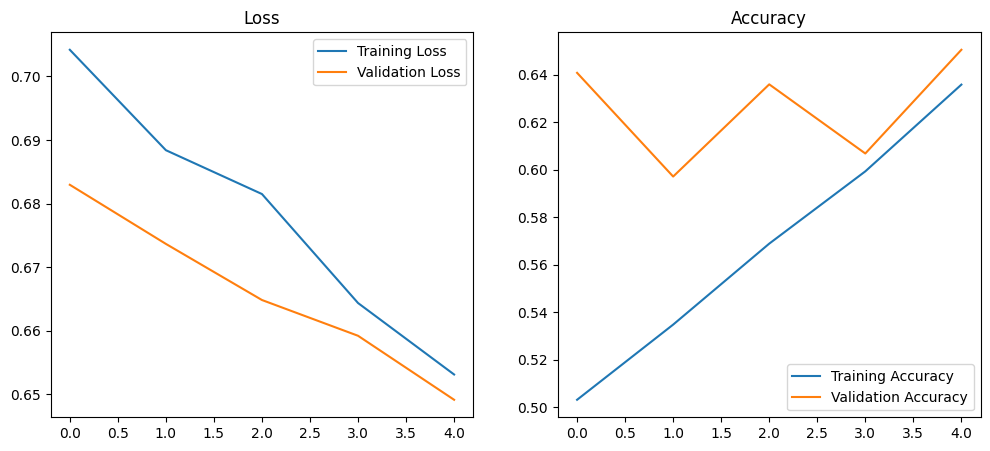

Test Loss: 0.6491, Test Accuracy: 0.6505



In [15]:
configs = [ (0.001, 32, 128), (0.0005, 64, 64)]

for base_model, model_name in experiments:
    print(f"\nEvaluating {model_name}\n")
    for lr, batch, neurons in configs:
        print(f"\nlearning_rate={lr}, batch_size={batch}, neurons={neurons}")
        model = build_transfer_model(base_model, neurons=neurons)
        history = compile_and_train(model, learning_rate=lr, batch_size=batch)
        plot_metrics(history)
        test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
        print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}\n")

In [17]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model.layers[-20:]:  # Unfreeze last 20 layers
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history_fine = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=5, batch_size=32, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

<ipython-input-17-d3b52c10f465>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


Epoch 1/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.6487 - loss: 0.6490 - val_accuracy: 0.7767 - val_loss: 0.6444
Epoch 2/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.6846 - loss: 0.6397 - val_accuracy: 0.7864 - val_loss: 0.6416
Epoch 3/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.6739 - loss: 0.6462 - val_accuracy: 0.7767 - val_loss: 0.6385
Epoch 4/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.7082 - loss: 0.6341 - val_accuracy: 0.7427 - val_loss: 0.6357
Epoch 5/5
26/26 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.6845 - loss: 0.6364 - val_accuracy: 0.7621 - val_loss: 0.6333
Test Loss: 0.6333, Test Accuracy: 0.7621


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

cm = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{cm}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step
Confusion Matrix:
[[80 20]
 [29 77]]


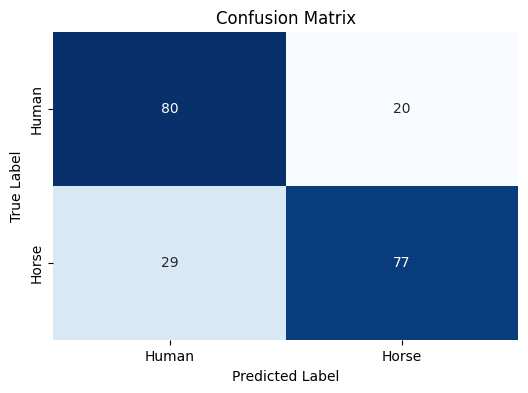

In [19]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Human', 'Horse'], yticklabels=['Human', 'Horse'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()